In [58]:
import scipy as sp
import numpy as np
import numpy.linalg as la
from scipy.integrate import odeint
from ipywidgets import interact, fixed
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
def Resp_tempo(x, t, w):

    #Definindo matrizes

    a11 = sp.zeros((4,4))
    a12 = sp.eye((4))
    a21 = sp.array([[alf/m, 0, 0, 0],[0, alf/m, 0, 0], [0, 0, delt/I, 0], [0, 0, 0, delt/I]]) 
    a22 = sp.array([[c11/m, 0, c12, 0], [0, c11/m, 0, c12], [c21, 0, c22/I, Ip*w], [0, c21, -Ip*w, c22/I]])
    f=[0,0,0,0,u*w**2*sp.cos(w*t),u*w**2*sp.sin(w*t),(Ip-I)/I*2*w**2*sp.cos(w*t),(Ip-I)/I*2*w**2*sp.sin(w*t)]
    
    #Matriz A
    a = sp.hstack((a11, a12))
    b = sp.hstack((-1*a21, -1*a22)) 
    
    A = sp.vstack((a,b)) 
 
    dxdt = A @ x + f 
    return dxdt


In [60]:
#Eixo
E = 209e9
rho = 7860
l = 10
d = 0.25
ar = sp.pi*d**2/4

In [61]:
#vetor espaco-estado
x=0
y=0
thx=0
thy=0
dx=0
dy=0
dthx=0
dthy=0

z=[x, y, thx, thy, dx, dy, dthx, dthy] #vetor de estado

#tempo
t0=0
tf=100
t=sp.linspace(t0,tf,100*(tf-t0))

In [62]:
#Sistema
m=rho*ar*l
I=m*(d**2/16+l**2/12)
I0=sp.pi*d**4/64
Ip=m*d**2/8
alp=12*E*I0/l**3
gama= -6*E*I0/l**2
delt=4*E*I0/l
csi=.1
c11=2*csi*sp.sqrt(alpha/m)
c12=0
c21=c12
c22=2*csi*sp.sqrt(delta/I) = C22
u=1

SyntaxError: can't assign to operator (<ipython-input-62-9280244b462e>, line 13)

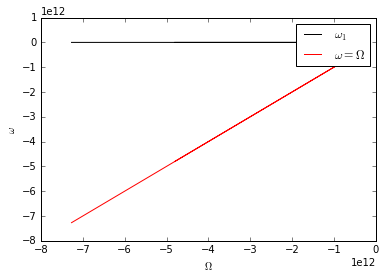

In [63]:
#Diagrama de Campbell
#frequencias naturais
w1=sp.linspace(0.2,10.2,10000)
Omega=m*I*w1**4-(alp*I+delt*m)*w1**2+(alp*delt-gama**3)/(m*Ip*(w1**2-alp/m)*w1)


#determinando as interseçoes
for i in range(len(w1)):
    if abs(w1[i] - Omega[i])<1e-1:
        print('w1 =', w1[i])
    else:
        pass

# desenhando o diagrama de Campbell
plt.plot(Omega, w1, 'k-', label='$\omega_1$')
#plt.plot(Omega, w3, 'b-', label='$\omega_3$')
plt.plot(Omega, Omega,'r-', label='$\omega=\Omega$')
plt.xlabel('$\Omega$')
plt.ylabel('$\omega$')
plt.legend()

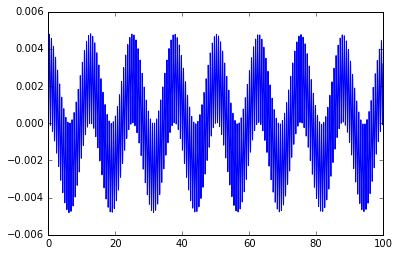

In [64]:
#para frequencia abaixo da natural
w1=.5
sol=odeint(Resp_tempo, z, t, args=(w1,))

plt.plot(t,sol[:,0])

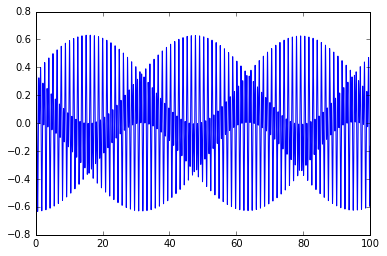

In [67]:
#para frequencia abaixo da natural
w2=5
sol=odeint(Resp_tempo, z, t, args=(w2,))

plt.plot(t,sol[:,0])